# Big Ideas Final Project

by: Dorothy Crow, Alice Wen, Salimat Shonekan, Zapata Soveranez 

## Best Pittsburgh Neighborhood for a kid!

---
---

### Introduction

Being a kid can be tough!! 

![tough kid](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExNGIzY2I0NTU2MDQyODE0YjUzOWVmNzU5MTc4OWI2ZWM5ZGFkYWU5ZCZlcD12MV9pbnRlcm5hbF9naWZzX2dpZklkJmN0PWc/tXL4FHPSnVJ0A/giphy.gif)


There's so much you can't do; so we thought we'd throw them a bone and when we brainstormed a unique metric to rank Pittsburgh neighborhoods. We finally decided to figure out what the best neighborhood to be a kid in is. We were pretty devoted to helping out these little ones from the beginning so we didn't brainstorm a lot of other overarching metrics, but we did debate going with some other submetrics. Before finalizing our data frames we debated going with some other submetrics like the density of candy stores or ice cream parlors. However, due to more pertinent criteria and limited data frame choice, we ended up going with...

---
---


   #### our submetrics:
   
   
<img src="https://media.giphy.com/media/f4OpXnvL9KJTtjxHDD/giphy.gif" width="250" height="250"/>
 
   * **playground density** <br>
       - A playground is the best thing a kid can experience for free! slides!  swings! who wouldnt want as many as possible?<br>

data set being used:

[city of pittsburgh playground](https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367)


In [7]:
import pprint
import geopandas as gp
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
pg = pd.read_csv("playgrounds.csv")

#itterates through data fram to load into a list
pg.groupby("neighborhood").count()
nghs =[]
for ngh, row in pg.iterrows():
    nghs.append(row["neighborhood"])

#makes a dictionary of the neighborhoods and their corresponding number of playgrounds
nghdict = dict()
for ngh in pg["neighborhood"]:
    if ngh in nghdict:
        nghdict[ngh] = nghdict.get(ngh) + 1
    else:
        nghdict[ngh] = 1

print(nghdict)        
print()    

{'Beechview': 5, 'Crawford-Roberts': 3, 'Central Northside': 2, 'Bedford Dwellings': 1, 'South Side Slopes': 5, 'South Side Flats': 2, 'Lower Lawrenceville': 1, 'Banksville': 1, 'Homewood North': 1, 'Bon Air': 1, 'Central Oakland': 1, 'Brighton Heights': 2, 'Brookline': 2, 'Hazelwood': 3, 'Squirrel Hill South': 8, 'Spring Garden': 1, 'Lincoln-Lemington-Belmar': 2, 'Windgap': 1, 'Troy Hill': 2, 'Westwood': 1, 'Perry South': 1, 'Homewood West': 1, 'Allegheny Center': 4, 'Strip District': 1, 'Stanton Heights': 1, 'Crafton Heights': 2, 'West Oakland': 1, 'East Carnegie': 1, 'Duquesne Heights': 1, 'East Liberty': 3, 'Esplen': 1, 'Fairywood': 1, 'Highland Park': 4, 'Upper Lawrenceville': 3, 'Fineview': 1, 'Regent Square': 1, 'Garfield': 2, 'Greenfield': 2, 'South Oakland': 3, 'Allentown': 1, 'Hays': 1, 'Elliott': 3, 'Morningside': 2, 'Terrace Village': 1, 'Larimer': 1, 'Carrick': 3, 'Central Lawrenceville': 1, 'Lincoln Place': 2, 'Manchester': 2, 'Marshall-Shadeland': 2, 'Sheraden': 4, 'Belt

In [12]:
#makes a condensed dictionary, taking out all neighborhoods without 4 or more playgrounds
smalldict = dict()
for ngh in nghdict:
    if nghdict[ngh] > 3:
        smalldict.update({ngh : nghdict[ngh]})

print(nghdf)
print()  

                     playground density
Beechview                             5
South Side Slopes                     5
Squirrel Hill South                   8
Allegheny Center                      4
Highland Park                         4
Sheraden                              4
Beltzhoover                           4



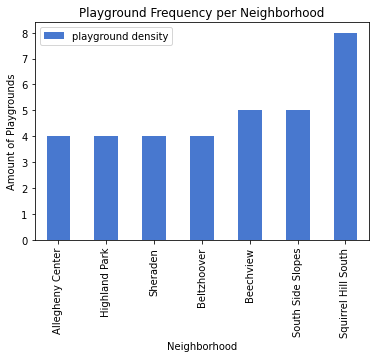

In [34]:
#coverts condensed dictionary to data frame
nghdf = pd.DataFrame.from_dict(smalldict, orient = 'index')

nghdf= nghdf.rename(columns = {0: 'playground density'})

#makes a bar graph based on the condensed data frame
nghdfS = nghdf.sort_values('playground density')
nghdfS.plot(kind="bar")
plt.title("Playground Frequency per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Amount of Playgrounds")
plt.style.use('seaborn-muted')


---

<img src="https://media.giphy.com/media/uTbm38Xcm4mp9oT3Th/giphy.gif" width="250" height="250"/> 
 
 * **walkability**<br>
       - A kid can't drive a car and bus passes can be so expenseive all they got are their little legs (or wheels) if they want to get around on their own. The walk score reflects how many sidewalks there are in the neighborhood and how close amenities are. 

data set being used: 

[allegheny county walk scores](https://data.wprdc.org/dataset/4d3d4324-b32a-4519-b56f-cee2340057bf/resource/682b1df1-a63b-4413-9362-ba077af63baa/download/walkscorect.xls-walk-score-by-ct.csv)
           <br><br>

**DAVID YOUR CODE STUFF GOES HERE**

---

 <img src="https://media.giphy.com/media/s9zMVxB2iHtpoqETbw/giphy.gif" width="250" height="250"/> 
 
 * **school density**<br>
       - Schools are a huge deal for kids, it will shape their educational experience for roughly 12 years and their social circle. It's important to have as many options to pick from as they can.

data set being used:
           
[enrollment by school and neighborhood](https://data.wprdc.org/dataset/27b6eef7-8825-4cc4-8b48-52c17ac80d37/resource/7b0660d1-c812-496d-ab0a-8560902e9e70/download/neighborhood_school_enrollment.csv)<br><br>
          

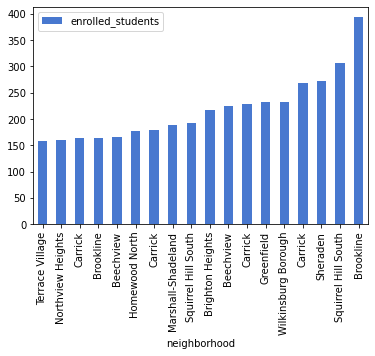

In [33]:
chip = pd.read_csv("https://data.wprdc.org/dataset/46fb3ca4-e844-4b42-b034-e87291d34699/resource/06664b02-c673-49d5-8a70-d3cd1c18ac8d/download/pps_schoolsapr2019publish.csv")
ran = pd.read_csv("https://data.wprdc.org/dataset/27b6eef7-8825-4cc4-8b48-52c17ac80d37/resource/7b0660d1-c812-496d-ab0a-8560902e9e70/download/neighborhood_school_enrollment.csv")

sorted = ran.sort_values(by = ['enrolled_students'])

#ran.plot.bar()
query_mask = ran['enrolled_students'] > 150
blah = ran[query_mask]
blah = blah.sort_values('enrolled_students')
blah.plot.bar(x = "neighborhood" , rot = 90)
plt.style.use('seaborn-muted')

---



<img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExY2FkOTRmYTVkOTliNDczNzcwNTBjMDI0NmUxZDEwNTE0Y2MwMjdhMyZlcD12MV9pbnRlcm5hbF9naWZzX2dpZklkJmN0PWc/uT8MbXO2lK4U5Ve2b0/giphy.gif" width="250" height="250"/>


  * **density of pools**<br>
       - Everyone loves a pool! but especially kids, and who can blame them I cant think of a better way to spend summer, other than diving for pool toys! The more options the better! <br>

data set being used:

[pittsburgh city pools](https://data.wprdc.org/datastore/dump/5cc254fe-2cbd-4912-9f44-2f95f0beea9a)<br><br>
          

**ALICE YOUR CODE STUFF GOES HERE**

---
---

### Best Neighborhood

#### Top Neighborhoods from each members' submetric:<br>
 
 * **Playgrounds:**
      - **Squirrel Hill** <br>
      - Beechview
      - South Side Slopes
      - Allegheny Center
       
       
  * **Schools:**<br>
      - Brookline
      - **Squirrel Hill**
      - Sheraden
      - Carrick
      - Wilkinsburg Burough
      
      
   * **Pools:**<br>
      - [Allegheny Center, Brookline, Polish Hill, Westwood, Brighton Heights]
      - [Perry North, **Squirrel Hill**, South Side Slopes, South Sides Flats, Sheraden, Bedford Dwellings, Perry South, ...]
   
   
  * **Walkability:**<br>
      - Dowtown
      - Sewickley
      - Lower Lawrenceville 
      - Shadyside
      - Ellsworth
      - Allegheny Center
      - Polish Hill
      - Lower East Liberty
      - **Squirrel Hill**

<br><br>
The overall best neighborhood for a kid to live in, taking into account all of our metrics is **Squirrel Hill**. We found this by comparing the top neighborhood from all of our metrics. We specifically found Squirrel Hill because it was Playground's top pick, in School's top 3, in Pool's roughly top 2, and in Walkability's top 10. Overall it was the neighborhood that was the most consistent among our top ranking neighborhoods. 

---
---

### Conclusion

 Overall, Squirrel Hill is a great place to be a kid in, with nearby schools (as it has ~300 students in the neighborhood enrolled in school), a pool, 8 playgrounds, and a decent amount of sidewalks and the ability to walk to nearby amenities. 
 <br> <br>

Dorothy: 
   <ul> Based on the "City of Pittsburgh Playgrounds" data set, collected by the Department of Public Works of the City of Pittsburgh, I first read the relevant data from my data frame into a dictionary with the number of playgrounds and the neighborhood name as the key, subtracted less pertinent neighborhoods, sorted my data to be in increasing order, and then visually displayed the data found in a bar graph. Through that, we can see Squirrel Hill is the obvious winner for the best neighborhood to be a kid in.
    <br> <br>
    As a native Pittsburgher I'm a little biased for my childhood neighborhood, Stanton Heights, and those surrounding it, like Highland Park. However, I had many friends, growing up, that lived in Squirrel Hill, and from personal experience I would Squirrel Hill is a top contender for best neighborhood to be a kid in.<br><br>
    
Alice:
    

**ALICE CONCLUSION GOES HERE**
    
    
Salimat:
    <ul>The data-driven determination of the best neighborhood is the same as my personal favorite neighborhood because it has the most enrolled students around the neighborhood and it is known as one the most beautiful branches of the Carnegie Library of Pittsburgh. In my belief, the pros to having a library branch in your neighborhood is the best thing a kid can ask for. According to data statistics, it appears that a kid is more likely to have fun in this neighborhood compared to any other neighborhood since there are more kids involved within the community. <br><br>
   
    
David:
    
**DAVID CONCLUSION GOES HERE**
    

![skaters](https://media.giphy.com/media/XMYUfP3QnRzr9CrTOS/giphy.gif)